In [325]:
#Loading Libraries
import pandas as pd
import os

#import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path #Why? This is to import the data as path
from datetime import date #Why
from pandas.tseries.offsets import MonthEnd #Why

#import the Data
stuff = Path('/Users/lindsaytruax/Desktop/SQL/Capstone_Projects/Capstone_2/USRealEstateTrends.csv')
df = pd.read_csv(stuff)

In [327]:
#identifying columns 
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'StateName', '2018-02-HomeValue',
       '2018-02-DaysPending', '2018-02-CutRaw', '2018-03-HomeValue',
       '2018-03-DaysPending', '2018-03-CutRaw',
       ...
       '2024-02-CutRaw', '2024-03-HomeValue', '2024-03-DaysPending',
       '2024-03-CutRaw', '2024-04-HomeValue', '2024-04-DaysPending',
       '2024-04-CutRaw', '2024-05-HomeValue', '2024-05-DaysPending',
       '2024-05-CutRaw'],
      dtype='object', length=232)

In [329]:
#rename column name
df.rename(index=str, columns={'RegionName' : 'Location', 'StateName':'State'}, inplace=True)

#dropping the not needed 
df.dropna(inplace=True)

#identifying missing values
df.isna().sum()

#melting data for graphing
df_melted = pd.melt(df, id_vars=['RegionID', 'SizeRank','Location','State'],
                    var_name='Date_Measure',
                    value_name='Value')
df_melted.head(3)

,RegionID,SizeRank,Location,State,Date_Measure,Value
0,394913,1,"New York, NY",NY,2018-02-HomeValue,468313.430126
1,753899,2,"Los Angeles, CA",CA,2018-02-HomeValue,629019.165765
2,394463,3,"Chicago, IL",IL,2018-02-HomeValue,229741.266973


In [331]:
#focusing Date_Measure for graphing purposes 
df_melted[['Year', 'Month_Measure']] = df_melted['Date_Measure'].str.split('-', expand=True, n=1)
df_melted.drop(columns=['Date_Measure'], inplace=True)
df_melted.head(5)

,RegionID,SizeRank,Location,State,Value,Year,Month_Measure
0,394913,1,"New York, NY",NY,468313.430126,2018,02-HomeValue
1,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02-HomeValue
2,394463,3,"Chicago, IL",IL,229741.266973,2018,02-HomeValue
3,394514,4,"Dallas, TX",TX,241533.231800,2018,02-HomeValue
4,394692,5,"Houston, TX",TX,208651.872272,2018,02-HomeValue


In [333]:
#Sep. Month and Measure
df_melted[['Month', 'Measure']] = df_melted['Month_Measure'].str.split('-', expand=True, n=1)
df_melted.drop(columns=['Month_Measure'], inplace=True)
df_melted.head(5)

,RegionID,SizeRank,Location,State,Value,Year,Month,Measure
0,394913,1,"New York, NY",NY,468313.430126,2018,02,HomeValue
1,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02,HomeValue
2,394463,3,"Chicago, IL",IL,229741.266973,2018,02,HomeValue
3,394514,4,"Dallas, TX",TX,241533.231800,2018,02,HomeValue
4,394692,5,"Houston, TX",TX,208651.872272,2018,02,HomeValue


In [335]:
#print([col for col in df.columns if '2018' in col])

In [337]:
# Pivot the DataFrame to have measures as columns
df_reorganized = df_melted.pivot_table(index=['RegionID','SizeRank','Location','State','Year','Month'] 	,
                                       columns='Measure', values='Value').reset_index()
df_reorganized.head(5)

Measure,RegionID,SizeRank,Location,State,Year,Month,CutRaw,DaysPending,HomeValue
0,394308,64,"Albany, NY",NY,2018,02,5100.0,64.0,218876.519605
1,394308,64,"Albany, NY",NY,2018,03,7000.0,62.0,219792.863791
2,394308,64,"Albany, NY",NY,2018,04,8000.0,54.0,220505.058669
3,394308,64,"Albany, NY",NY,2018,05,9000.0,45.0,221526.705984
4,394308,64,"Albany, NY",NY,2018,06,9100.0,47.0,222479.931387


In [339]:
#Pull frame by State CA
CA_df = df_reorganized.loc[df_reorganized['State'] == 'CA']
print(CA_df.head())

#Calculate the mean for CA
avg_value_ca = CA_df.groupby(CA_df.index)['HomeValue'].mean().reset_index()
print(avg_value_ca)

#Now it's Texas
TX_df = df_reorganized.loc[df_reorganized['State'] == 'TX']
print(TX_df.head())

#Calculate the mean for TX
avg_value_TX = TX_df.groupby(TX_df.index)['HomeValue'].mean().reset_index()
print(avg_value_TX)

Measure  RegionID  SizeRank         Location State  Year Month  CutRaw  \
304        394357        63  Bakersfield, CA    CA  2018    02  7000.0   
305        394357        63  Bakersfield, CA    CA  2018    03  7100.0   
306        394357        63  Bakersfield, CA    CA  2018    04  6000.0   
307        394357        63  Bakersfield, CA    CA  2018    05  7600.0   
308        394357        63  Bakersfield, CA    CA  2018    06  8000.0   

Measure  DaysPending      HomeValue  
304             51.0  212531.666950  
305             48.0  213905.260766  
306             46.0  214996.109254  
307             47.0  216057.814209  
308             48.0  217117.256125  
     index      HomeValue
0      304  212531.666950
1      305  213905.260766
2      306  214996.109254
3      307  216057.814209
4      308  217117.256125
..     ...            ...
831   9267  397722.476963
832   9268  398115.874381
833   9269  399551.022811
834   9270  400993.970354
835   9271  401768.945976

[836 rows x 2 

In [341]:
CA_df['Date'] = pd.to_datetime(CA_df['Year'].astype(str) + '-' + CA_df['Month'].astype(str))
print(CA_df['Date'].head())

TX_df['Date'] = pd.to_datetime(TX_df['Year'].astype(str) + '-' + TX_df['Month'].astype(str))
print(TX_df['Date'].head())

304   2018-02-01
305   2018-03-01
306   2018-04-01
307   2018-05-01
308   2018-06-01
Name: Date, dtype: datetime64[ns]
532   2018-02-01
533   2018-03-01
534   2018-04-01
535   2018-05-01
536   2018-06-01
Name: Date, dtype: datetime64[ns]


/var/folders/k5/pw4j05rj6v5f9rxlvmxw5k580000gn/T/ipykernel_81940/1893758131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k5/pw4j05rj6v5f9rxlvmxw5k580000gn/T/ipykernel_81940/1893758131.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



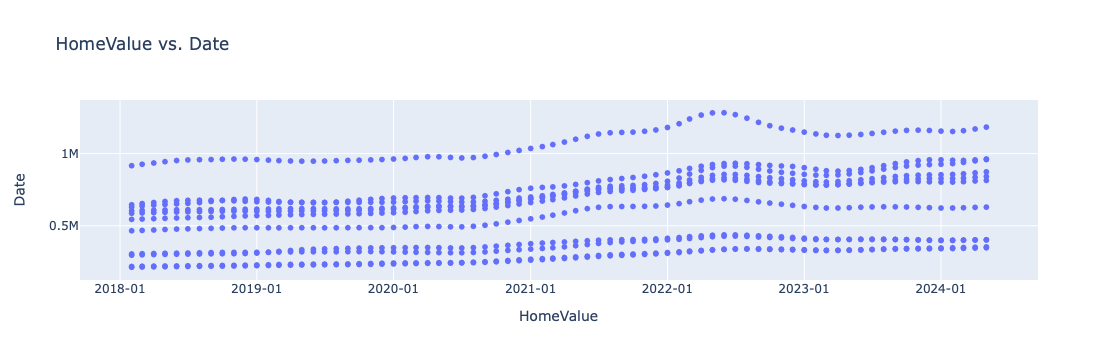

In [366]:
#https://plotly.com/python/line-and-scatter/
#fig = px.scatter(df, x="sepal_width", y="sepal_length")

fig = px.scatter(
    CA_df, 
    x='Date',
    y='HomeValue',
    hover_data={'Location':True, 'HomeValue':True},
    title='Cost of the Homes in California',
    labels={'x': 'Date', 'y': 'HomeValue'}
)

fig.update_layout(
    xaxis_title='HomeValue',
    yaxis_title='Date',
    title='HomeValue vs. Date',
    xaxis=dict(
        tickformat='%Y-%m',
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True
    )
)
fig.show()

In [368]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_value_ca, x='Date', y='HomeValue', marker='o', color='blue')

# Customize the plot
plt.title('Home Value From 2018 to 2024 in California')
plt.xlabel('Date 2018 to 2024')
plt.ylabel('Home Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

ValueError: Could not interpret value `Date` for parameter `x`

<Figure size 1400x700 with 0 Axes>

In [299]:
#Pull data from the year 2018
#Mean of Homevaue in 2018 VS 2024
Ca_df_2018 = CA_df[CA_df['Date'].dt.year ==2018]
CA_2018_mean = Ca_df_2018['HomeValue'].mean()
print(CA_2018_mean)

506040.69570894906


In [301]:
Ca_df_2024 = CA_df[CA_df['Date'].dt.year ==2024]
CA_2024_mean = Ca_df_2024['HomeValue'].mean()
print(CA_2024_mean)

698308.6691243352


In [347]:
#Compare the Mean of both dates and how much it increased for CA
difference_2018_to_2024 = (CA_2024_mean - CA_2018_mean)/2
print("This displays the increase of property value on average from 2018 to 2024 : ", difference_2018_to_2024)


This displays the increase of property value on average from 2018 to 2024 :  96133.98670769305


In [349]:
#finding outliers

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



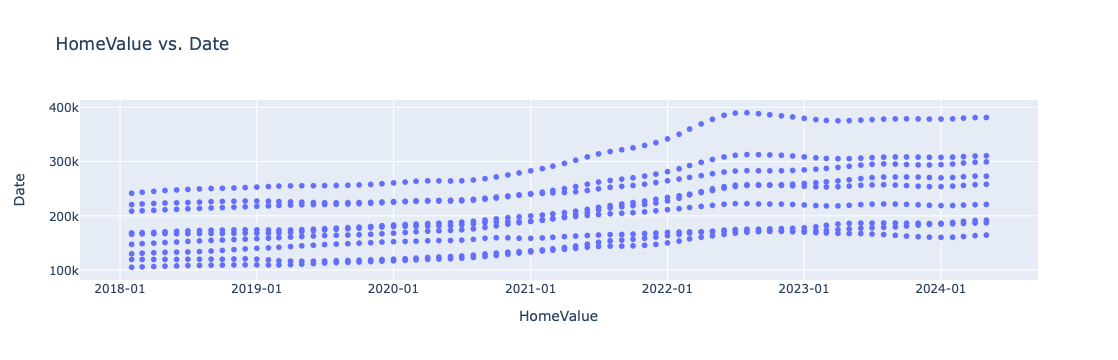

In [352]:
fig = px.scatter(
    TX_df, 
    x='Date',
    y='HomeValue',
    hover_data={'Location':True, 'HomeValue':True},
    title='Cost of the Homes in California',
    labels={'x': 'Date', 'y': 'HomeValue'}
)

fig.update_layout(
    xaxis_title='HomeValue',
    yaxis_title='Date',
    title='HomeValue vs. Date',
    xaxis=dict(
        tickformat='%Y-%m',
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True
    )
)
fig.show()

In [354]:
#Have the Mean of TX 2018

TX_df_2018 = TX_df[TX_df['Date'].dt.year ==2018]
TX_2018_mean = TX_df_2018['HomeValue'].mean()
print(CA_2018_mean)

506040.69570894906


In [356]:
#Have the Mean of TX 2024

TX_df_2024 = TX_df[TX_df['Date'].dt.year ==2024]
TX_2024_mean = TX_df_2024['HomeValue'].mean()
print(CA_2024_mean)

698308.6691243352


In [358]:
#comparing the two means to see how TX property increased. 

difference_2018_to_2024_TX = (TX_2024_mean - TX_2018_mean)/2
print("This displays the increase of property value on average from 2018 to 2024 for Texas: ", difference_2018_to_2024_TX)


This displays the increase of property value on average from 2018 to 2024 for Texas:  40681.888254448044


In [ ]:
#Outliers in the two states

In [360]:
len(df_reorganized.RegionName.unique())

AttributeError: 'DataFrame' object has no attribute 'RegionName'